# Stroke Prediction

In [1]:
#Import packages and libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix 
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=4)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")


In [2]:
# to read the data
data=pd.read_csv('stroke data.csv')


In [3]:
# checking first five entries in the dataset
df=data.copy()
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.describe() # checking the summary of statistics

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df.info() #checking informations of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.isnull().sum() #checking for null values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

So, we notice that null/missing values are only in bmi column;there are 201 of them

In [7]:
#filling the null values with the average of bmi
df=df.fillna(np.mean(df['bmi']))

In [8]:
df.isnull().sum() #checking the dataset again for the null values

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

So, no null value is present in the dataset now

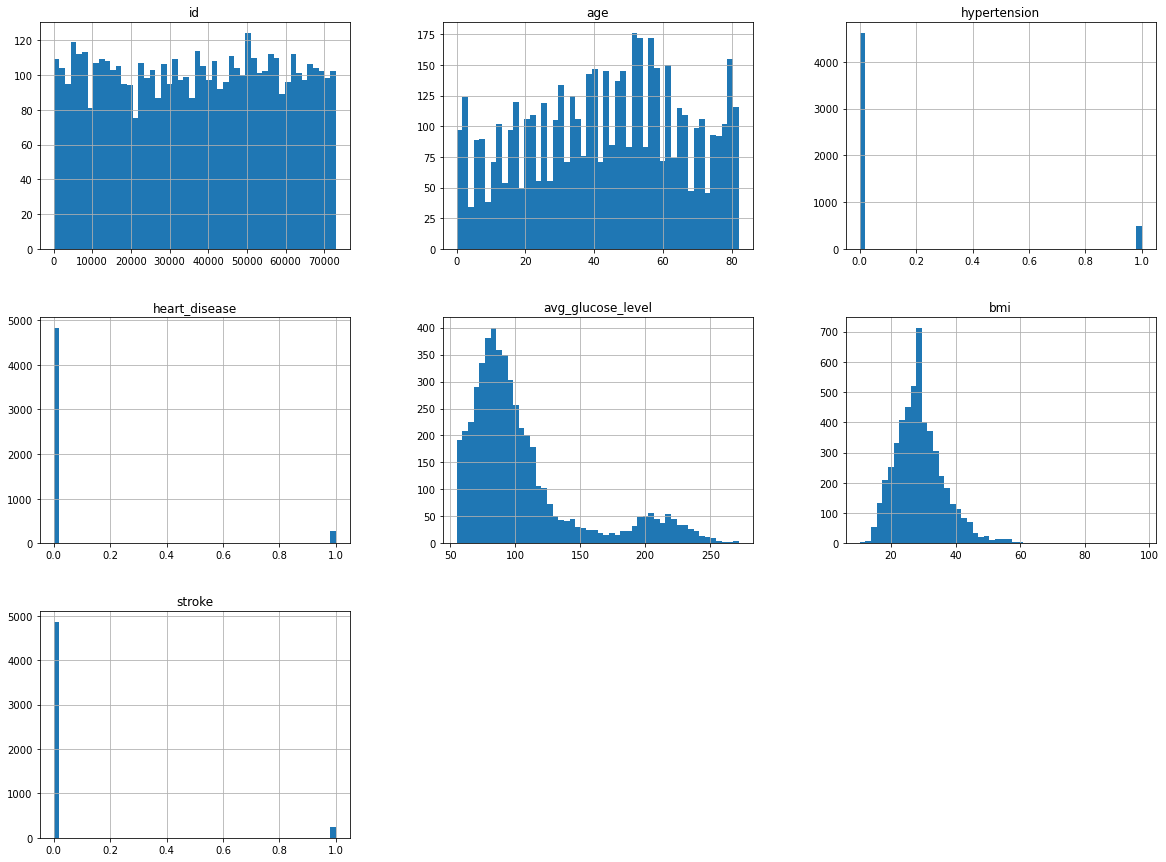

In [9]:
# plot Histogram of the given data by using matplotlib
df.hist(bins=50, figsize=(20,15))
plt.show()

Column 'id' seems irrelevant to analysis and hence let's get rid of it

In [10]:
# dropping the column named 'id'
df.drop(columns=['id'],inplace=True) 
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


# Checking Correlation Matrix

array([[<AxesSubplot:xlabel='stroke', ylabel='stroke'>,
        <AxesSubplot:xlabel='bmi', ylabel='stroke'>,
        <AxesSubplot:xlabel='age', ylabel='stroke'>,
        <AxesSubplot:xlabel='hypertension', ylabel='stroke'>,
        <AxesSubplot:xlabel='heart_disease', ylabel='stroke'>],
       [<AxesSubplot:xlabel='stroke', ylabel='bmi'>,
        <AxesSubplot:xlabel='bmi', ylabel='bmi'>,
        <AxesSubplot:xlabel='age', ylabel='bmi'>,
        <AxesSubplot:xlabel='hypertension', ylabel='bmi'>,
        <AxesSubplot:xlabel='heart_disease', ylabel='bmi'>],
       [<AxesSubplot:xlabel='stroke', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>,
        <AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='hypertension', ylabel='age'>,
        <AxesSubplot:xlabel='heart_disease', ylabel='age'>],
       [<AxesSubplot:xlabel='stroke', ylabel='hypertension'>,
        <AxesSubplot:xlabel='bmi', ylabel='hypertension'>,
        <AxesSubplot:xlabel='age', ylabel='hy

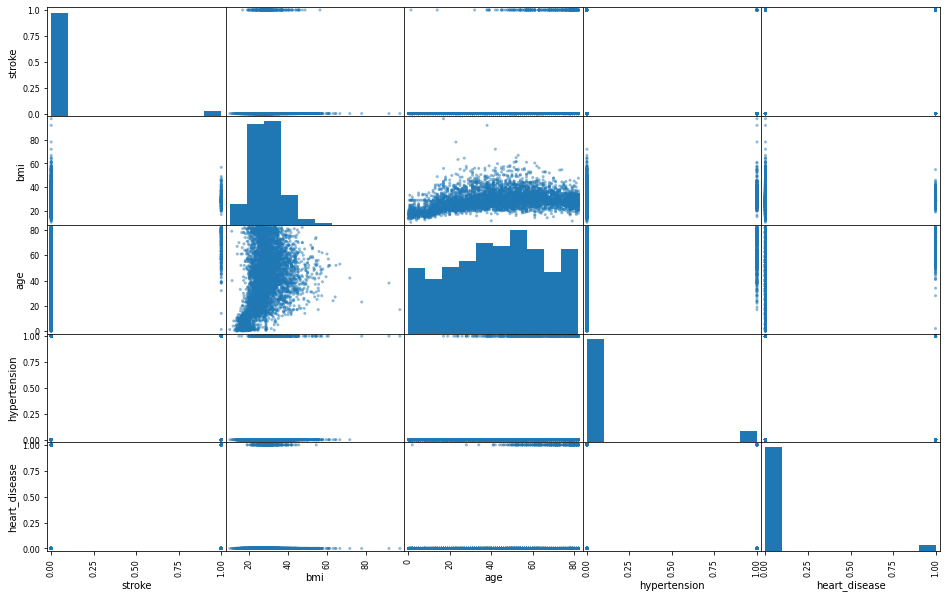

In [11]:
# plotting some correlations 
attribute_colmns=['stroke','bmi','age','hypertension','heart_disease','work_type','smoking_status']
scatter_matrix(df[attribute_colmns],figsize=(16,10))

# Mapping Categorical Variables

In [12]:
df #checking the dataset again to recall the entries needs to be mapped

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [13]:
df['work_type'] = df['work_type'].map({'Private':0, 'Self-employed': 1, 'Govt_job':2, 'children':3, 'Never_worked':4})
df['gender'] = df['gender'].map({'Male':0, 'Female':1})
df['Residence_type'] = df['Residence_type'].map({'Urban':0, 'Rural':1})
df['smoking_status'] = df['smoking_status'].map({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3})
df['ever_married'] = df['ever_married'].map({'Yes':0, 'No':1})

In [14]:
df # cheking the dataset after mapping is doene

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,67.0,0,1,0,0,0,228.69,36.600000,0,1
1,1.0,61.0,0,0,0,1,1,202.21,28.893237,1,1
2,0.0,80.0,0,1,0,0,1,105.92,32.500000,1,1
3,1.0,49.0,0,0,0,0,0,171.23,34.400000,2,1
4,1.0,79.0,1,0,0,1,1,174.12,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1.0,80.0,1,0,0,0,0,83.75,28.893237,1,0
5106,1.0,81.0,0,0,0,1,0,125.20,40.000000,1,0
5107,1.0,35.0,0,0,0,1,1,82.99,30.600000,1,0
5108,0.0,51.0,0,0,0,0,1,166.29,25.600000,0,0


# Checking Pairwise Correlation

<AxesSubplot:>

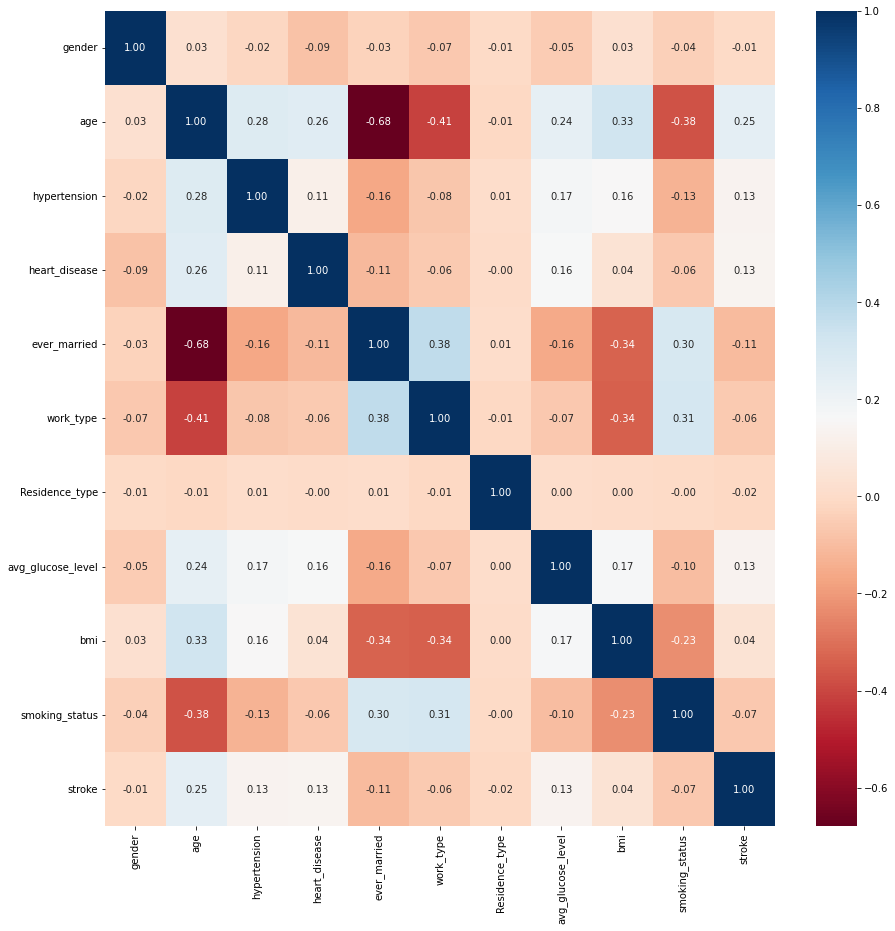

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap='RdBu', annot=True, fmt=".2f")

From the above heatmap we can observe that stroke has positive correlation with bmi,avg_glocuse_level, heart_disease, hypertention, and age; no strong positive correlation present in the dataset.

# Checking the relation of stroke with other attributes

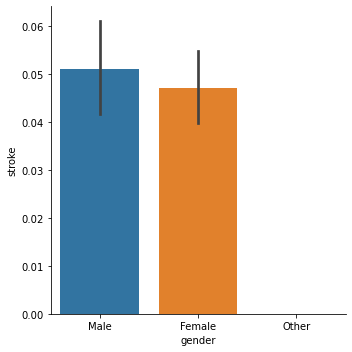

In [16]:
sns.catplot(x="gender", y="stroke", kind="bar", data=data) 

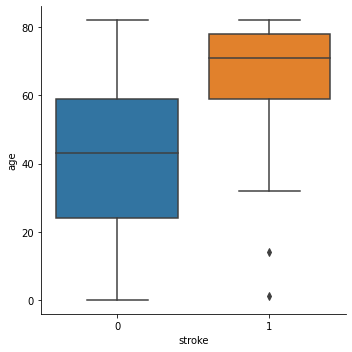

In [17]:
sns.catplot(x="stroke", y="age", kind="box", data=data)

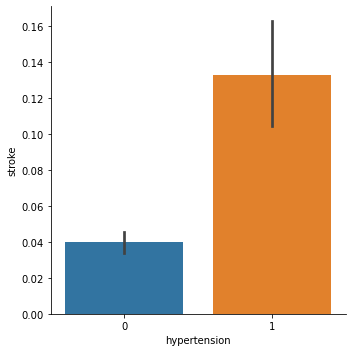

In [18]:
sns.catplot(x="hypertension", y="stroke", kind="bar", data=data)

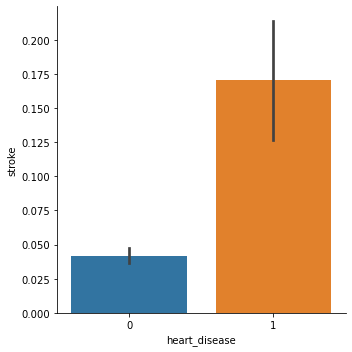

In [19]:
sns.catplot(x="heart_disease", y="stroke", kind="bar", data=data)

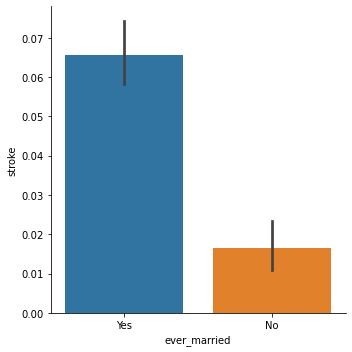

In [20]:
sns.catplot(x="ever_married", y="stroke", kind="bar", data=data)

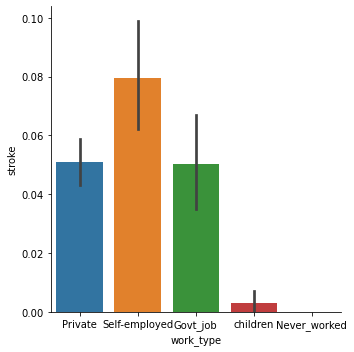

In [21]:
sns.catplot(x="work_type", y="stroke", kind="bar", data=data)

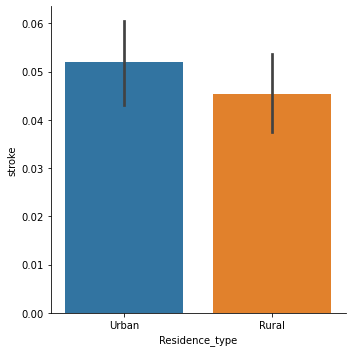

In [22]:
sns.catplot(x="Residence_type", y="stroke", kind="bar", data=data)

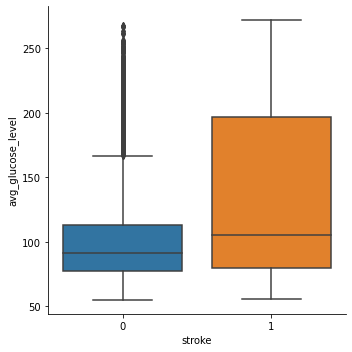

In [23]:
sns.catplot(x="stroke", y="avg_glucose_level", kind="box", data=data)

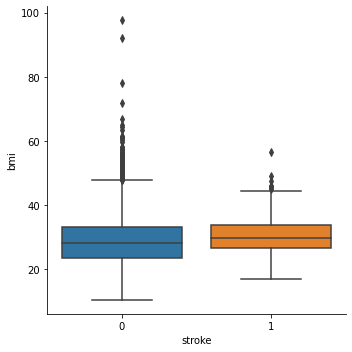

In [24]:
sns.catplot(x="stroke", y="bmi", kind="box", data=data)

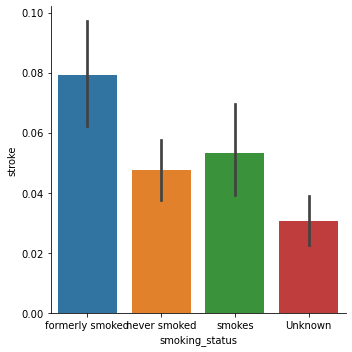

In [25]:
sns.catplot(x="smoking_status", y="stroke", kind="bar", data=data)

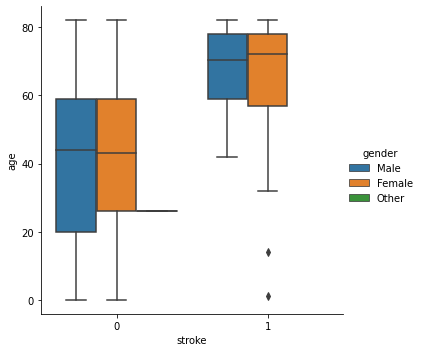

In [26]:
sns.catplot(x='stroke', y="age", hue = 'gender', kind="box", data=data)

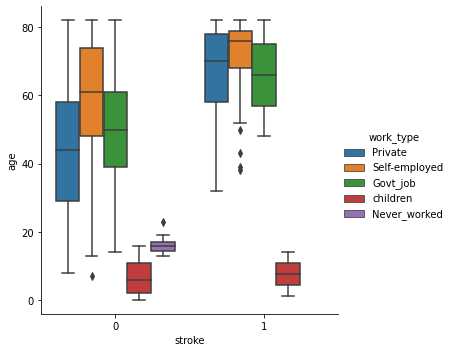

In [27]:
sns.catplot(x='stroke', y="age", hue = 'work_type', kind="box", data=data)

#  Machine learning to predict stroke

Choosing features and selecting prediction target

In [28]:
X = df.drop(['stroke'], axis = 1)
y = df['stroke']


In [29]:
X.isnull().sum() #checking X dataset for null values

gender               1
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

There is still one null value present in gender. Let's fill it with 0

In [30]:
X.gender.fillna(0,inplace=True) # filling the missing value with 0

In [31]:
X.isnull().sum() #checking the dataset again for null values

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [32]:
y.isnull().sum()# checking null value for y target

0

Now Let's apply SMOTE(Synthetic Minority Oversampling Technique) oversampling method to solve imbalance problem of our prediction target,y. Otherwise, it will us to poor performance of the model.

In [33]:
smot = SMOTE(random_state=42)
X_smote, y_smote = smot.fit_resample(X, y)

# Spilitting our dataset into train and test

In [34]:
X_train,X_test, y_train,y_test=train_test_split(X_smote,y_smote,test_size=0.30,random_state=42)

 Standardization of our training and testing data is required beacause of different scales

In [35]:
scalr = StandardScaler()
X_train = scalr.fit_transform(X_train)
X_test = scalr.transform(X_test)

In [36]:
X_train # checking X_train after standardization

array([[-1.23210683,  0.98985694, -0.30725127, ..., -0.24078404,
        -0.09129067,  1.64123098],
       [ 0.88512413, -0.0069544 ,  3.25466511, ...,  1.6460581 ,
         1.6288787 ,  0.68901197],
       [ 0.95175169,  0.30832257, -0.30725127, ..., -0.94477261,
        -0.76393669, -0.26320705],
       ...,
       [ 0.95175169,  1.17159944, -0.30725127, ..., -0.7172381 ,
        -1.13271783, -0.26320705],
       [ 0.95175169, -0.41864743, -0.30725127, ..., -0.34703283,
         3.1862867 ,  0.68901197],
       [-1.23210683,  1.12694258, -0.30725127, ...,  1.01409306,
         0.30126865, -1.21542606]])

In [37]:
X_test # checking X_test after standardization

array([[ 0.95175169, -2.19063679, -0.30725127, ..., -0.55573581,
        -1.85101367,  1.64123098],
       [-1.07648872,  1.17159944, -0.30725127, ..., -0.83949556,
        -0.50252313, -0.26320705],
       [-1.23210683,  0.49006507, -0.30725127, ..., -0.295354  ,
         0.55280444, -0.26320705],
       ...,
       [-1.23210683, -1.14561742, -0.30725127, ..., -1.01072637,
        -0.22805367, -0.26320705],
       [ 0.95175169,  0.71724319, -0.30725127, ..., -0.47117045,
         0.79777953, -0.26320705],
       [-1.23210683,  0.81365429, -0.30725127, ...,  1.82440834,
         0.60433774, -1.21542606]])

# Applying several Models

In [38]:
# importing the packages and libraries we need at this stage
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [39]:
#https://towardsdatascience.com/model-evaluation-techniques-for-classification-models-eac30092c38b
def Model(model):
    model.fit(X_train,y_train)
    score = model.score(X_test, y_test)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    prediction = model.predict(X_test)
    cm = confusion_matrix(y_test,prediction)
    print('Testing Score \n',score)
    plot_confusion_matrix(model,X_test,y_test,cmap="OrRd")
    metrics.plot_roc_curve(model, X_test, y_test)  
    
    

Testing Score 
 0.8193349331504971


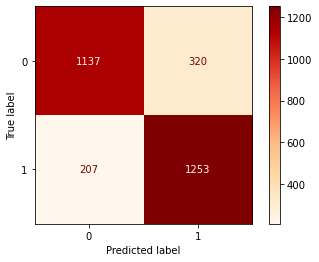

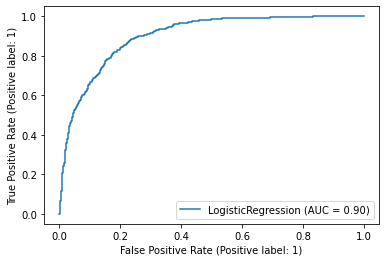

In [40]:
# Applying LogicticRegeression model
logtic_regress=LogisticRegression(random_state=1)
Model(logtic_regress)


Testing score 0.82 and AUC score 90% indicates that the model is performing quite well.



Testing Score 
 0.9465203976688379


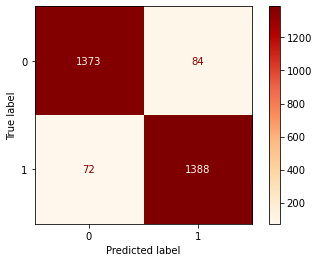

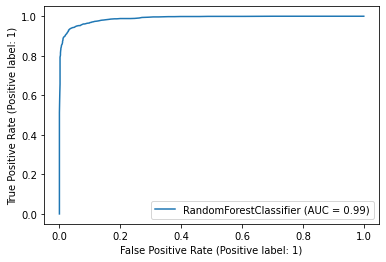

In [41]:
# Applying RandomForestClassifier model
Rand_forest=RandomForestClassifier(random_state=1)
Model(Rand_forest)


Wow! even this model performing way more better. With testing score 0.95 and AUC score 99% indicates that the model performance is execellent!

# Thank you so much!